In [6]:
import pandas as pd
from distfit import distfit
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def count_workdays(start_date, end_date):
    # 创建日期范围
    date_range = pd.date_range(start=start_date, end=end_date)

    # 过滤出工作日
    workdays = date_range[date_range.weekday < 5]  # 0表示周一，4表示周五

    return len(workdays)

In [8]:
data = pd.read_excel('副本有效数据.xlsx')
data['更新日期'] = pd.to_datetime(data['更新日期'])
data['受理日期'] = pd.to_datetime(data['受理日期'])
data['diff'] = np.zeros(542)
for i in data.index:
        data['diff'][i] = count_workdays(data['受理日期'][i],data['更新日期'][i])-1

In [15]:
data['diff'].describe()

count    542.000000
mean     189.832103
std       74.271318
min       21.000000
25%      144.000000
50%      185.000000
75%      224.000000
max      565.000000
Name: diff, dtype: float64

Text(0.5, 1.0, 'Raw serve data distribution')

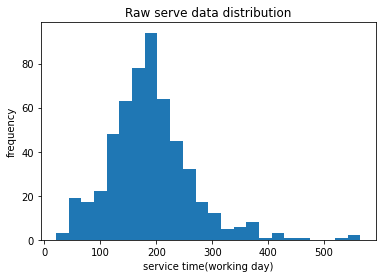

In [21]:
plt.hist(data['diff'],bins = 24)
plt.xlabel('service time(working day)')
plt.ylabel('frequency')
plt.title('Raw serve data distribution')

Text(0.5, 1.0, 'Processed serve data distribution')

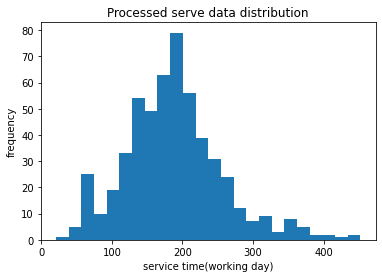

In [22]:
X=data['diff']
X = X[X<500]

plt.hist(X,bins = 24)
plt.xlabel('service time(working day)')
plt.ylabel('frequency')
plt.title('Processed serve data distribution')

count    539.000000
mean     187.816327
std       69.360526
min       21.000000
25%      144.000000
50%      185.000000
75%      223.000000
max      452.000000
Name: diff, dtype: float64

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.08059e-05] [loc=187.816 scale=69.296]
[distfit] >INFO> [expon     ] [0.0 sec] [RSS: 0.000148102] [loc=21.000 scale=166.816]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.00036343] [loc=-0.058 scale=21.058]
[distfit] >INFO> [dweibull  ] [0.01 sec] [RSS: 6.31899e-06] [loc=182.313 scale=54.265]
[distfit] >INFO> [t         ] [0.04 sec] [RSS: 1.06569e-05] [loc=187.331 scale=69.118]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 4.1204e-05] [loc=146.674 scale=69.087]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 9.68936e-06] [loc=-107.635 scale=16.053]
[distfit] >INFO> [lognorm   ] [0.05 sec] [RSS: 9.4237e-06] [loc=-230.192 scale=412.428]
[distfit] >INFO> [beta      ] [0.06 sec] [RSS: 9.7739e-06] [loc=-103.187 scale=79619168.488]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.000119936] [loc=21.000 scale=431.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 1.18009e-05] [loc=-25156.612 sc

(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '\ndweibull(c=1.12314, loc=182.313, scale=54.2646)'}, xlabel='Values', ylabel='Frequency'>)

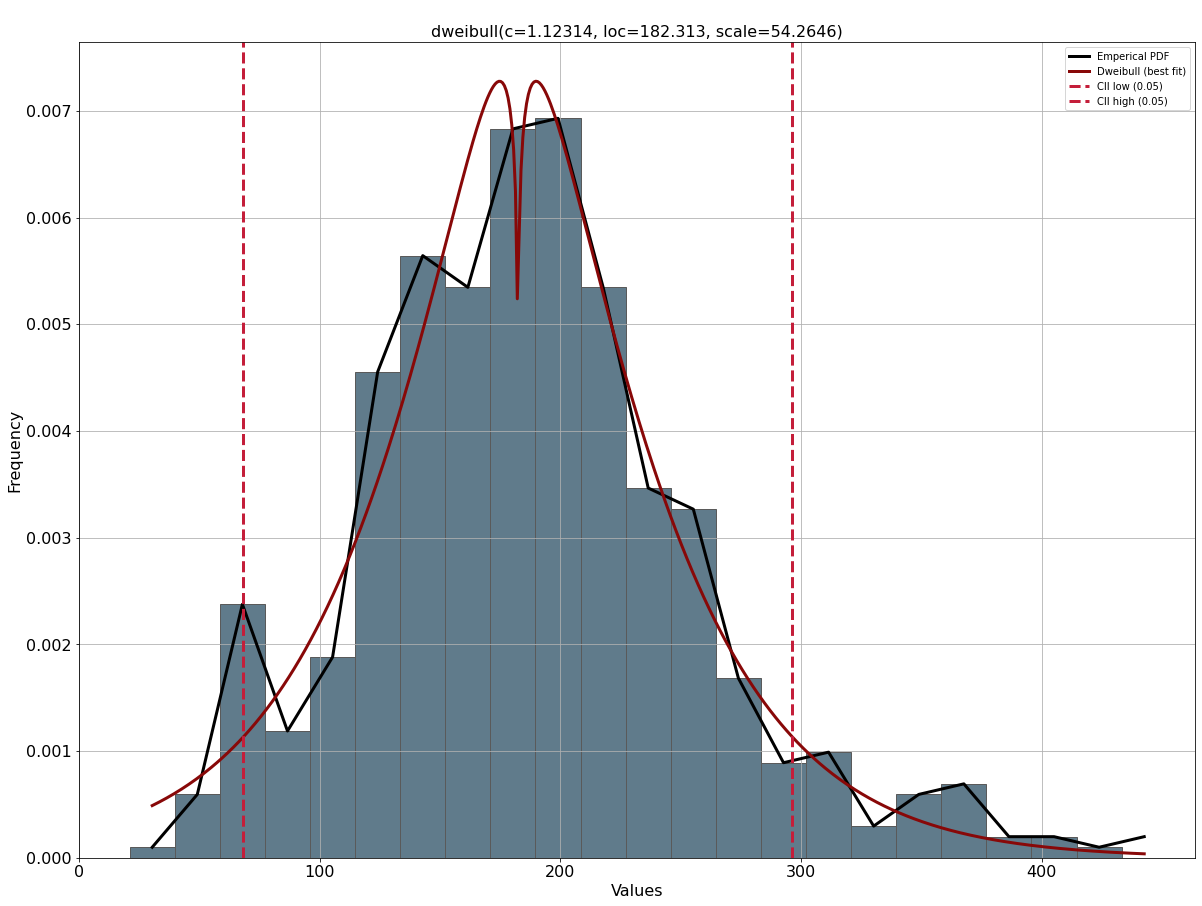

In [11]:
dist = distfit()
dist.alpha = 0.05  # 设置 CII KS 检验的显著性水平为 1%
dist.distributions = [
    'norm', 'expon', 'pareto', 'dweibull', 't', 'gamma', 'lognorm', 'beta',
    'uniform', 'loggamma', 'genextreme', 'weibull', 'triang', 'cauchy', 'chi2'
]  # 添加要测试的分布
dist.fit_transform(X)
dist.model
# 绘制分布图像
dist.plot()

[distfit] >INFO> Bootstrap for 11 distributions with n_boots=100
[distfit] >INFO> Bootstrap: [dweibull  ] > Score: 0.35 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [lognorm   ] > Score: 0.53 > Pass 95% CII KS-test: True
[distfit] >INFO> Bootstrap: [gamma     ] > Score: 0.04 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [beta      ] > Score: 0.02 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [t         ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [norm      ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [loggamma  ] > Score: 0 > Pass 95% CII KS-test: False  
[distfit] >INFO> Bootstrap: [genextreme] > Score: 0.14 > Pass 95% CII KS-test: True  
[distfit] >INFO> Bootstrap: [uniform   ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [expon     ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> Bootstrap: [pareto    ] > Score: 0 > Pass 95% CII KS-test: False
[distfit] >INFO> 

(<Figure size 1440x720 with 2 Axes>,
 <Axes: title={'center': 'Lognorm (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

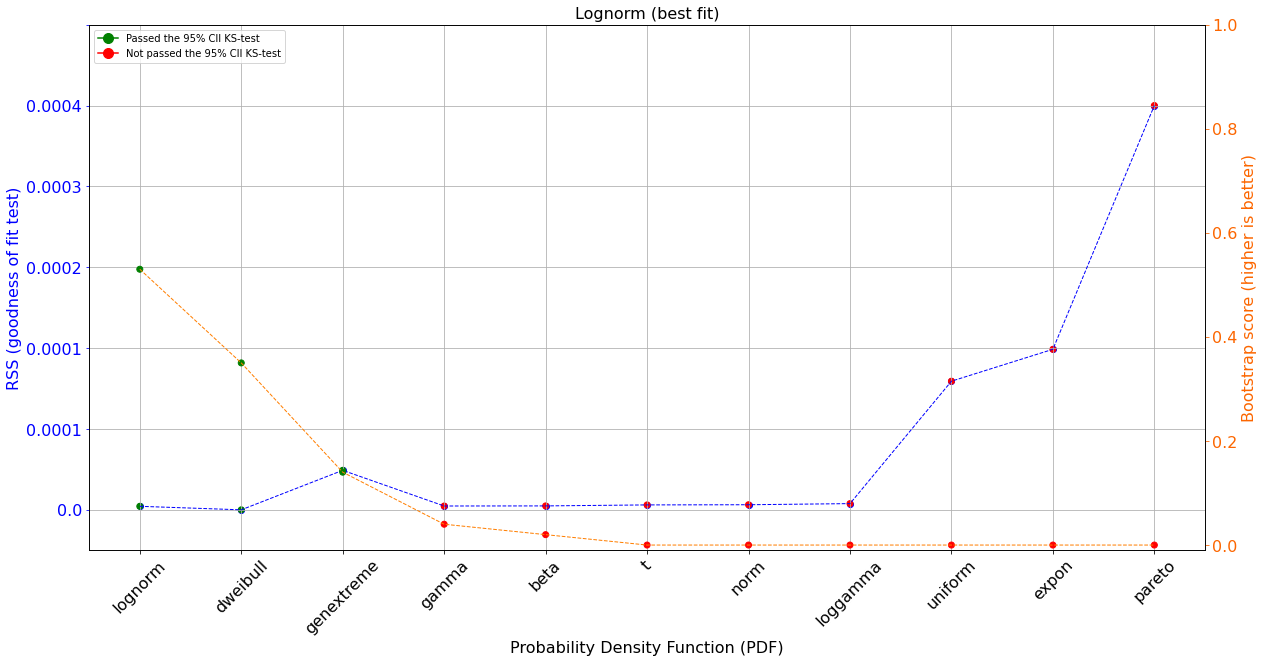

In [12]:
results = dist.bootstrap(X, n_boots=100)
dist.plot_summary()

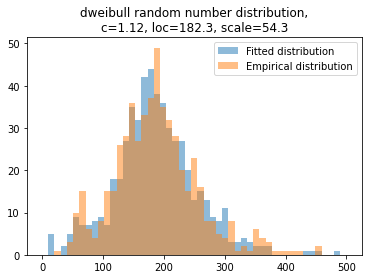

In [23]:
from scipy.stats import dweibull
size = 550
rvs = dweibull.rvs(c=1.12314, loc=182.313, scale=54.2646, size=size)
rvs = [x for x in rvs if x >= 0]
bins = np.linspace(0, 500, 50)
plt.title('dweibull random number distribution,\nc=1.12, loc=182.3, scale=54.3')
plt.hist(rvs,bins,alpha=0.5,label='Fitted distribution')
plt.hist(X,bins,alpha=0.5,label='Empirical distribution')
plt.legend(loc='upper right')
plt.show()